In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bz2
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import files

uploaded = files.upload()


#rain_file = bz2.BZ2File('train.ft.txt.bz2')
#test_file = bz2.BZ2File('test.ft.txt.bz2')

Saving test.ft.txt.bz2 to test.ft.txt.bz2


In [4]:
from google.colab import files

uploaded = files.upload()

Saving train.ft.txt.bz2 to train.ft.txt.bz2


In [ ]:
def load_extract(file):
    texts, labels = [], []
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
    print('Done !')
    return np.array(labels), texts


In [5]:
import bz2
import numpy as np

train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')
train_labels, train_texts = load_extract(train_file)
test_labels, test_texts = load_extract(test_file)

Done !
Done !


In [6]:

import pandas as pd
import bz2

# Open the bz2 file
with bz2.BZ2File('train.ft.txt.bz2', 'r') as f:
    # Read the lines from the file
    lines = f.readlines()

# Convert lines to strings
lines = [line.decode('utf-8') for line in lines]

# Split each line into label and text
data = [line.split(' ', 1) for line in lines]

# Create a DataFrame
df = pd.DataFrame(data, columns=['label', 'text'])

# Display the DataFrame
print(df.head())

        label                                               text
0  __label__2  Stuning even for the non-gamer: This sound tra...
1  __label__2  The best soundtrack ever to anything.: I'm rea...
2  __label__2  Amazing!: This soundtrack is my favorite music...
3  __label__2  Excellent Soundtrack: I truly like this soundt...
4  __label__2  Remember, Pull Your Jaw Off The Floor After He...


In [ ]:
def clean_texts(texts):
    stwords = stopwords.words('english')
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i]) #replace every digit with 0
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)

        text = re.sub('[^a-zA-Z]', ' ', text) #anything which is not a character replace with whitespace char
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords
        text = ' '.join(text)
        temp_texts.append(text)
    print('--100%--Done !')
    return temp_texts


In [7]:

import numpy as np
import pandas as pd
import bz2
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
import nltk
nltk.download('stopwords')

# Function to load and extract labels and texts from the file
def load_extract(file, max_samples=None):
    texts, labels = [], []
    total_samples = 0
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
        total_samples += 1
        # Break loop if maximum number of samples is reached
        if max_samples is not None and total_samples >= max_samples:
            break
    print('Done !')
    return np.array(labels), texts

# Function to clean texts
def clean_texts(texts):
    stwords = stopwords.words('english')
    temp_texts = []
    total_samples = len(texts)
    for i, text in enumerate(texts):
        text = re.sub('\d','0',text) #replace every digit with 0
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)

        text = re.sub('[^a-zA-Z]', ' ', text) #anything which is not a character replace with whitespace char
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords
        text = ' '.join(text)
        temp_texts.append(text)
        # Print progress every 10000 samples
        if (i + 1) % 10000 == 0 or (i + 1) == total_samples:
            print(f"--{((i + 1) / total_samples) * 100:.2f}%--Done !")
    return temp_texts

# Open the bz2 files and load data
max_train_samples = 10000  # Set maximum number of train samples
max_test_samples = 10000  # Set maximum number of test samples
with bz2.BZ2File('train.ft.txt.bz2', 'r') as train_file, bz2.BZ2File('test.ft.txt.bz2', 'r') as test_file:
    train_labels, train_texts = load_extract(train_file, max_samples=max_train_samples)
    test_labels, test_texts = load_extract(test_file, max_samples=max_test_samples)

# Cleaning the texts
train_texts_cleaned = clean_texts(train_texts)
test_texts_cleaned = clean_texts(test_texts)






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Done !
Done !
--100.00%--Done !
--100.00%--Done !


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Preprocessing
max_words = 200000  # Max number of words to keep
maxlen = 100  # Max length of sequences

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=max_words)
X_train_tfidf = vectorizer.fit_transform(train_texts_cleaned)
X_test_tfidf = vectorizer.transform(test_texts_cleaned)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Model training
svm_model = make_pipeline(SVC(kernel='linear'))  # You can change the kernel if needed
svm_model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Test Accuracy: 0.852


In [11]:
# Model training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = logistic_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy:", accuracy)

Logistic Regression Test Accuracy: 0.8538


In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Evaluation strategy addressing over-fitting and under-fitting using k-fold cross-validation
k_fold = 10
svm_model_cv = SVC(kernel='linear')
cross_val_scores = cross_val_score(svm_model_cv, X_train_tfidf, y_train, cv=k_fold)
print(f'Cross-validation scores: {cross_val_scores}')



Cross-validation scores: [0.856 0.851 0.833 0.837 0.815 0.787 0.834 0.814 0.854 0.842]


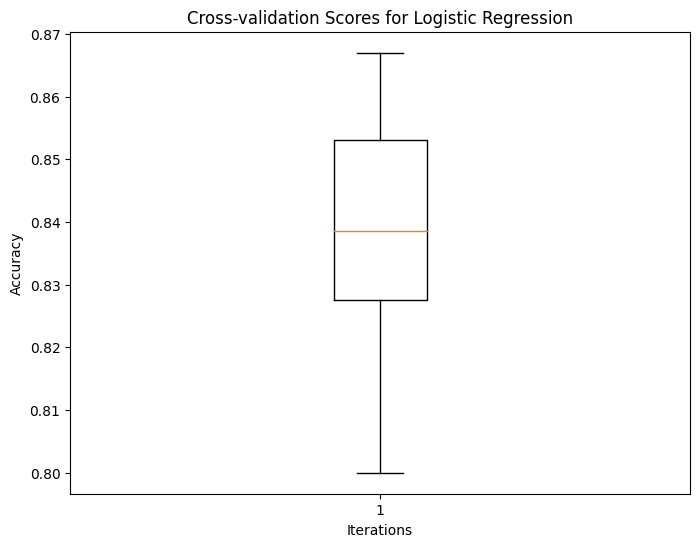

In [17]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Logistic Regression model
logistic_model_cv = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation
k_fold = 10
logistic_cross_val_scores = cross_val_score(logistic_model_cv, X_train_tfidf, y_train, cv=k_fold)

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(logistic_cross_val_scores)
plt.title('Cross-validation Scores for Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()


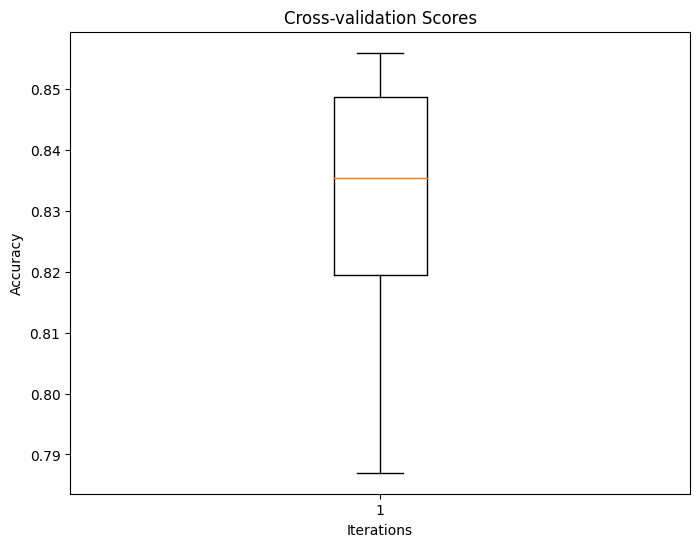

In [16]:
import matplotlib.pyplot as plt

# Cross-validation scores
cross_val_scores = [0.856, 0.851, 0.833, 0.837, 0.815, 0.787, 0.834, 0.814, 0.854, 0.842]

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(cross_val_scores)
plt.title('Cross-validation Scores')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()


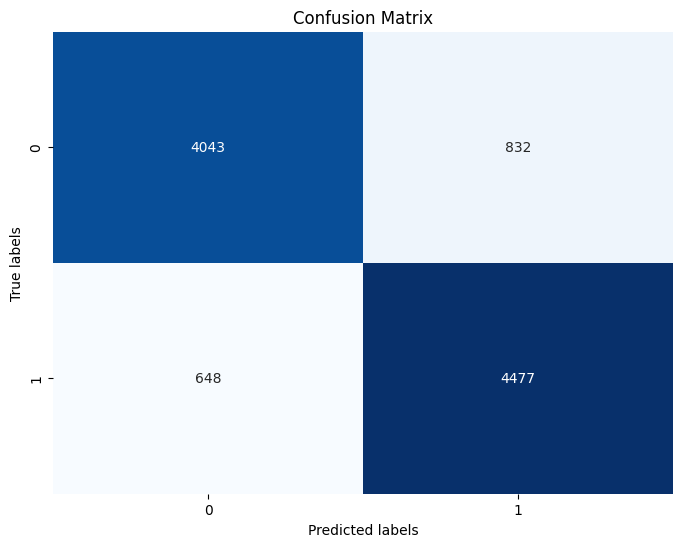

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2435
           1       0.84      0.87      0.85      2565

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



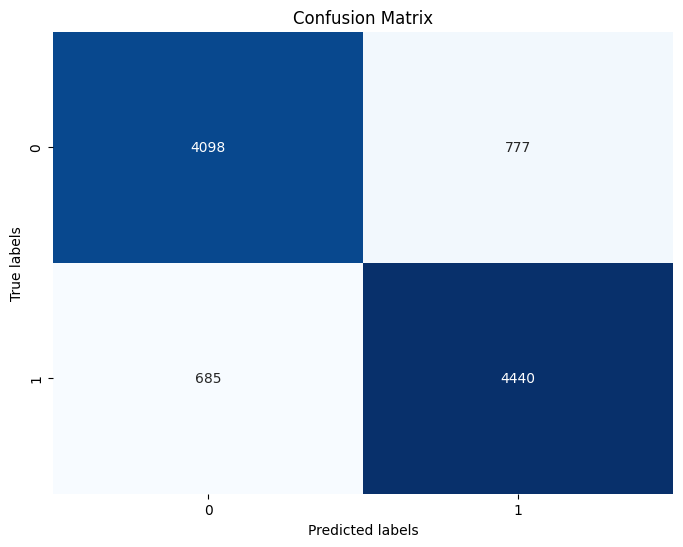

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4875
           1       0.85      0.87      0.86      5125

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [19]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Logistic Regression model predictions
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred_logistic)

# Print the report
print(report)



Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4875
           1       0.82      0.84      0.83      5125

    accuracy                           0.83     10000
   macro avg       0.83      0.82      0.83     10000
weighted avg       0.83      0.83      0.83     10000



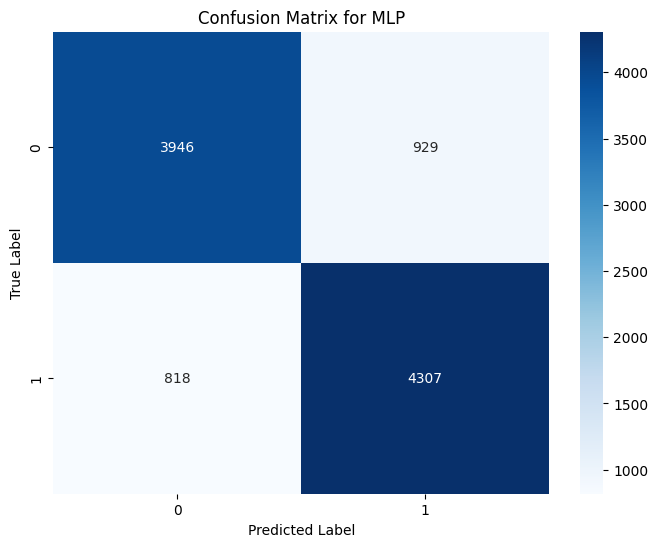

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Instantiate MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Train the MLPClassifier model
mlp_model.fit(X_train_tfidf, y_train)

# MLP model predictions
y_pred_mlp = mlp_model.predict(X_test_tfidf)

# Confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)


# Classification report for MLP
print("Classification Report for MLP:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix for MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix for MLP with counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
